### Hepatitis Mortality Prediction Model Using ML

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("hepatitis001.csv")

In [3]:
print(df.head())

   class  age  sex  steroid  antivirals  fatigue  malaise  anorexia  \
0      2   31    1        1           2        1        1         1   
1      2   16    1        1           2        2        1         1   
2      2   42    1        1           2        1        2         2   
3      2   26    1        1           2        1        2         2   
4      2   46    1        1           2        1        1         2   

   liver_big  liver_firm  spleen_palable  spiders  ascites  varices  \
0          2           2               2        2        2        2   
1          2           1               2        1        2        1   
2          1           1               2        2        2        2   
3          2           1               2        1        2        2   
4          2           1               1        1        2        2   

   bilirubin  alk_phosphate  sgot  albumin  protime  histology  
0       0.70            134    48     4.59       27          1  
1       0.78    

In [4]:
df.shape

(5000, 20)

In [5]:
df.dtypes

class               int64
age                 int64
sex                 int64
steroid             int64
antivirals          int64
fatigue             int64
malaise             int64
anorexia            int64
liver_big           int64
liver_firm          int64
spleen_palable      int64
spiders             int64
ascites             int64
varices             int64
bilirubin         float64
alk_phosphate       int64
sgot                int64
albumin           float64
protime             int64
histology           int64
dtype: object

In [6]:
df.isnull().sum()

class             0
age               0
sex               0
steroid           0
antivirals        0
fatigue           0
malaise           0
anorexia          0
liver_big         0
liver_firm        0
spleen_palable    0
spiders           0
ascites           0
varices           0
bilirubin         0
alk_phosphate     0
sgot              0
albumin           0
protime           0
histology         0
dtype: int64

In [7]:
df["class"].value_counts()  # Live 2 And Dies 1

class
2    4335
1     665
Name: count, dtype: int64

In [8]:
print(df.count())

class             5000
age               5000
sex               5000
steroid           5000
antivirals        5000
fatigue           5000
malaise           5000
anorexia          5000
liver_big         5000
liver_firm        5000
spleen_palable    5000
spiders           5000
ascites           5000
varices           5000
bilirubin         5000
alk_phosphate     5000
sgot              5000
albumin           5000
protime           5000
histology         5000
dtype: int64


In [9]:
X = df.drop('class', axis=1)     # contains features
y = df['class']        #Class contains Die(1) or Live(2)

In [10]:
print(X.shape,y.shape)

(5000, 19) (5000,)


In [11]:
### Apply the algorithm to balance the data set
from imblearn.over_sampling import RandomOverSampler

In [12]:
# Initialize the RandomOverSampler
ros = RandomOverSampler(random_state=42)

In [13]:
# Fit and transform the data
X_resampled, y_resampled = ros.fit_resample(X, y)

# Create a new DataFrame with the resampled data
df_resampled = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.Series(y_resampled, name='class')], axis=1)

In [14]:
df_resampled.shape

(8670, 20)

In [15]:
df_resampled.dtypes

age                 int64
sex                 int64
steroid             int64
antivirals          int64
fatigue             int64
malaise             int64
anorexia            int64
liver_big           int64
liver_firm          int64
spleen_palable      int64
spiders             int64
ascites             int64
varices             int64
bilirubin         float64
alk_phosphate       int64
sgot                int64
albumin           float64
protime             int64
histology           int64
class               int64
dtype: object

In [16]:
print(df_resampled.isnull().sum())

age               0
sex               0
steroid           0
antivirals        0
fatigue           0
malaise           0
anorexia          0
liver_big         0
liver_firm        0
spleen_palable    0
spiders           0
ascites           0
varices           0
bilirubin         0
alk_phosphate     0
sgot              0
albumin           0
protime           0
histology         0
class             0
dtype: int64


In [17]:
print((df_resampled["class"]==1).sum())

4335


In [18]:
df_resampled["class"].value_counts()

class
2    4335
1    4335
Name: count, dtype: int64

In [19]:
X = df_resampled.drop('class', axis=1)     # contains features
y = df_resampled['class']        #Class contains Die(1) or Live(2)

In [20]:
print(X.shape,y.shape)

(8670, 19) (8670,)


In [21]:
labels = ["Less than 10","10-20","20-30","30-40","40-50","50-60","60-70","70 and more"]
bins=[0,10,20,30,40,50,60,70,80]
freq_df = df_resampled.groupby(pd.cut(df_resampled['age'],bins=bins,labels=labels)).size()

In [22]:
freq_df

age
Less than 10       7
10-20            218
20-30           1007
30-40           2005
40-50           2262
50-60           1805
60-70            903
70 and more      463
dtype: int64

In [23]:
freq_df=freq_df.reset_index(name='count')
freq_df

,age,count
0,Less than 10,7
1,10-20,218
2,20-30,1007
3,30-40,2005
4,40-50,2262
5,50-60,1805
6,60-70,903
7,70 and more,463


<Axes: >

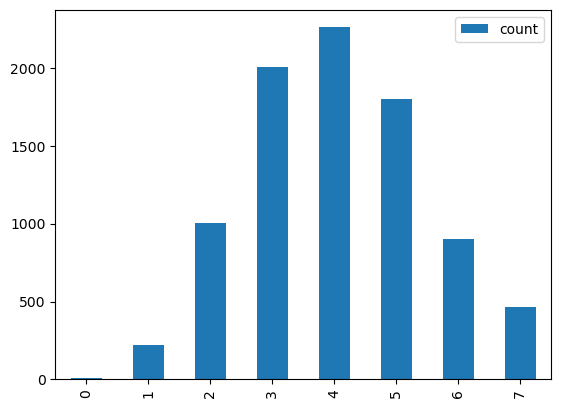

In [24]:
freq_df.plot(kind='bar')

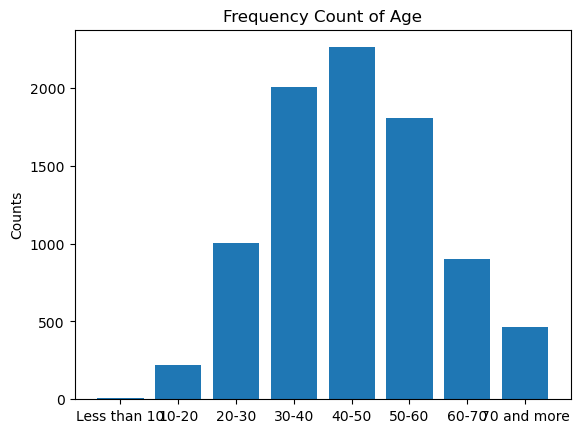

In [25]:
# Plot of Freq Table

plt.bar(freq_df['age'],freq_df['count'])
plt.ylabel('Counts')
plt.title('Frequency Count of Age')
plt.show()

In [26]:
# Train Test Split 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### MACHINE LEARNING ALGORITHM

In [27]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from catboost import CatBoostClassifier

In [28]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_recall_fscore_support

In [29]:
clf=DecisionTreeClassifier()
knn=KNeighborsClassifier()
lr=LogisticRegression()
rf=RandomForestClassifier()
svm=SVC()
nb=GaussianNB()
cat = CatBoostClassifier(iterations=500, depth=10, learning_rate=0.05, loss_function='Logloss')

In [30]:
clf.fit(X_resampled,y_resampled)
knn.fit(X_resampled,y_resampled)
lr.fit(X_resampled,y_resampled)
rf.fit(X_resampled,y_resampled)
svm.fit(X_resampled,y_resampled)
nb.fit(X_resampled,y_resampled)
cat.fit(X_resampled,y_resampled, eval_set=(X_resampled, y_resampled), early_stopping_rounds=50, verbose=100)

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0:	learn: 0.6876753	test: 0.6876811	best: 0.6876811 (0)	total: 179ms	remaining: 1m 29s
100:	learn: 0.2628615	test: 0.2628854	best: 0.2628854 (100)	total: 3.46s	remaining: 13.7s
200:	learn: 0.1381532	test: 0.1381909	best: 0.1381909 (200)	total: 6.77s	remaining: 10.1s
300:	learn: 0.0817029	test: 0.0817411	best: 0.0817411 (300)	total: 10.1s	remaining: 6.66s
400:	learn: 0.0528326	test: 0.0528665	best: 0.0528665 (400)	total: 13.4s	remaining: 3.3s
499:	learn: 0.0363766	test: 0.0364043	best: 0.0364043 (499)	total: 16.6s	remaining: 0us

bestTest = 0.03640428839
bestIteration = 499



In [31]:
y_pred1=clf.predict(X_resampled)
y_pred2=knn.predict(X_resampled)
y_pred3=lr.predict(X_resampled)
y_pred4=rf.predict(X_resampled)
y_pred5=svm.predict(X_resampled)
y_pred6=nb.predict(X_resampled)
y_pred7=cat.predict(X_resampled)

In [32]:
acc1=accuracy_score(y_resampled,y_pred1)
acc2=accuracy_score(y_resampled,y_pred2)
acc3=accuracy_score(y_resampled,y_pred3)
acc4=accuracy_score(y_resampled,y_pred4)
acc5=accuracy_score(y_resampled,y_pred5)
acc6=accuracy_score(y_resampled,y_pred6)
acc7=accuracy_score(y_resampled,y_pred7)

In [33]:
print(f"CLF Accuracy: {acc1:.2f}")
print(f"KNN Accuracy: {acc2:.2f}")
print(f"LR Accuracy: {acc3:.2f}")
print(f"RF Accuracy: {acc4:.2f}")
print(f"SVM Accuracy: {acc5:.2f}")
print(f"NB Accuracy: {acc6:.2f}")
print(f"CAT Accuracy: {acc7:.2f}")

CLF Accuracy: 1.00
KNN Accuracy: 0.87
LR Accuracy: 0.54
RF Accuracy: 1.00
SVM Accuracy: 0.52
NB Accuracy: 0.54
CAT Accuracy: 1.00


In [34]:
# Define a function for performance analysis
def evaluate_model(y_true, y_pred):
    # Confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    print("Confusion Matrix:\n", cm)

    # Classification report
    print("\nClassification Report:\n", classification_report(y_true, y_pred))

    # Accuracy
    accuracy = accuracy_score(y_true, y_pred)
    print(f"\nAccuracy: {accuracy:.2f}")

    # Precision, Recall, F-beta score
    precision, recall, fbeta, _ = precision_recall_fscore_support(y_true, y_pred, beta=1, average='binary')
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F-beta Score: {fbeta:.2f}")
    
    
    # True positives, false positives, true negatives, false negatives
    tn, fp, fn, tp = cm.ravel()

    # False Positive Rate (FPR)
    fpr = fp / (fp + tn)

    # False Negative Rate (FNR)
    fnr = fn / (fn + tp)

    #print("False Positive Rate (FPR):", fpr)
    #print("False Negative Rate (FNR):", fnr)
    print(f"False Positive Rate (FPR): {fpr:.2f}")
    print(f"False Negative Rate (FNR): {fnr:.2f}")
    
    sns.heatmap(cm, annot=True, fmt="d", cmap="Reds", cbar=True, 
            xticklabels=['Predicted 1', 'Predicted 2'], 
            yticklabels=['Actual 1', 'Actual 2'])
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

Decision Tree Classifier:
Confusion Matrix:
 [[4335    0]
 [   0 4335]]

Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00      4335
           2       1.00      1.00      1.00      4335

    accuracy                           1.00      8670
   macro avg       1.00      1.00      1.00      8670
weighted avg       1.00      1.00      1.00      8670


Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F-beta Score: 1.00
False Positive Rate (FPR): 0.00
False Negative Rate (FNR): 0.00


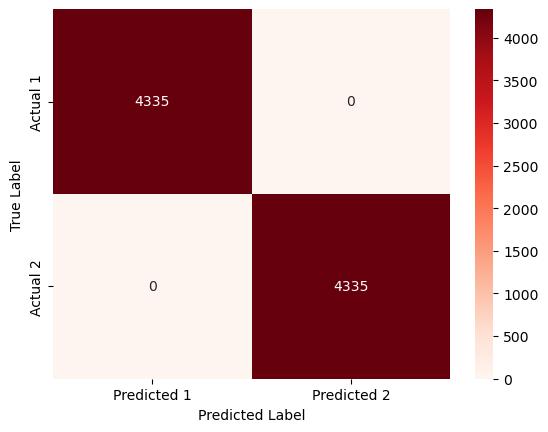


K-Nearest Neighbors:
Confusion Matrix:
 [[4305   30]
 [1056 3279]]

Classification Report:
               precision    recall  f1-score   support

           1       0.80      0.99      0.89      4335
           2       0.99      0.76      0.86      4335

    accuracy                           0.87      8670
   macro avg       0.90      0.87      0.87      8670
weighted avg       0.90      0.87      0.87      8670


Accuracy: 0.87
Precision: 0.80
Recall: 0.99
F-beta Score: 0.89
False Positive Rate (FPR): 0.01
False Negative Rate (FNR): 0.24


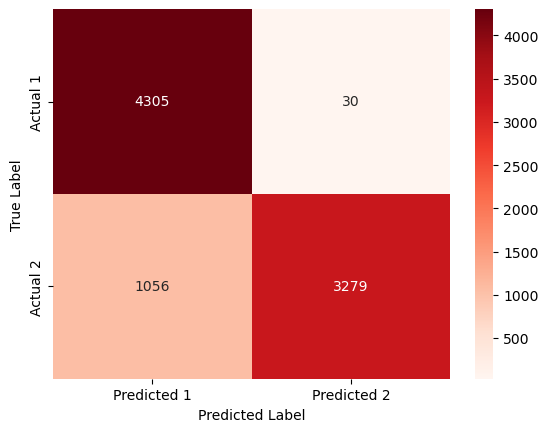


Logistic Regression:
Confusion Matrix:
 [[2138 2197]
 [1806 2529]]

Classification Report:
               precision    recall  f1-score   support

           1       0.54      0.49      0.52      4335
           2       0.54      0.58      0.56      4335

    accuracy                           0.54      8670
   macro avg       0.54      0.54      0.54      8670
weighted avg       0.54      0.54      0.54      8670


Accuracy: 0.54
Precision: 0.54
Recall: 0.49
F-beta Score: 0.52
False Positive Rate (FPR): 0.51
False Negative Rate (FNR): 0.42


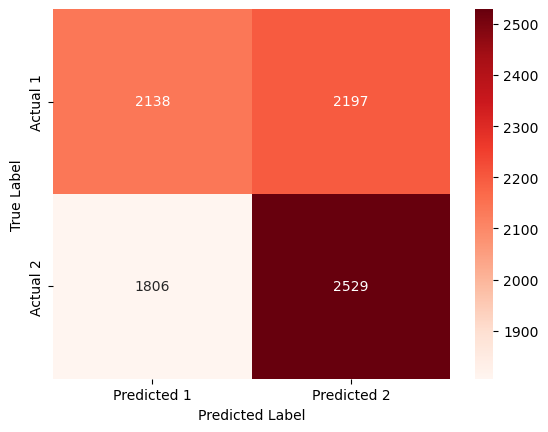


Random Forest Classifier:
Confusion Matrix:
 [[4335    0]
 [   0 4335]]

Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00      4335
           2       1.00      1.00      1.00      4335

    accuracy                           1.00      8670
   macro avg       1.00      1.00      1.00      8670
weighted avg       1.00      1.00      1.00      8670


Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F-beta Score: 1.00
False Positive Rate (FPR): 0.00
False Negative Rate (FNR): 0.00


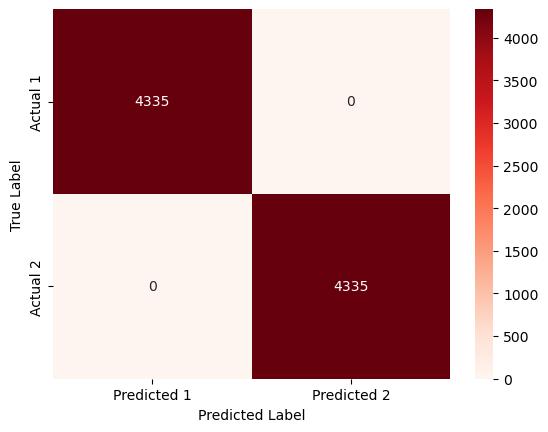


Support Vector Machine:
Confusion Matrix:
 [[1947 2388]
 [1808 2527]]

Classification Report:
               precision    recall  f1-score   support

           1       0.52      0.45      0.48      4335
           2       0.51      0.58      0.55      4335

    accuracy                           0.52      8670
   macro avg       0.52      0.52      0.51      8670
weighted avg       0.52      0.52      0.51      8670


Accuracy: 0.52
Precision: 0.52
Recall: 0.45
F-beta Score: 0.48
False Positive Rate (FPR): 0.55
False Negative Rate (FNR): 0.42


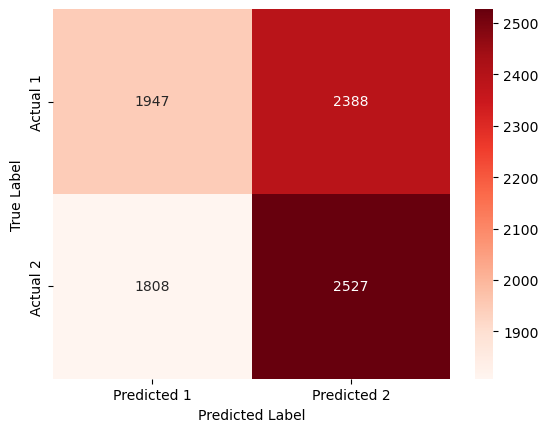


Naive Bayes:
Confusion Matrix:
 [[1929 2406]
 [1624 2711]]

Classification Report:
               precision    recall  f1-score   support

           1       0.54      0.44      0.49      4335
           2       0.53      0.63      0.57      4335

    accuracy                           0.54      8670
   macro avg       0.54      0.54      0.53      8670
weighted avg       0.54      0.54      0.53      8670


Accuracy: 0.54
Precision: 0.54
Recall: 0.44
F-beta Score: 0.49
False Positive Rate (FPR): 0.56
False Negative Rate (FNR): 0.37


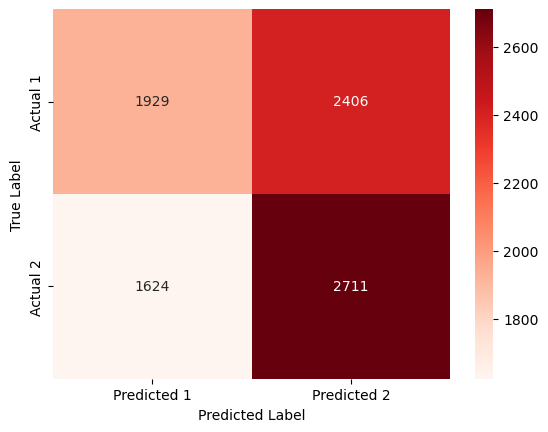


CatBoost Classifier:
Confusion Matrix:
 [[4335    0]
 [   0 4335]]

Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00      4335
           2       1.00      1.00      1.00      4335

    accuracy                           1.00      8670
   macro avg       1.00      1.00      1.00      8670
weighted avg       1.00      1.00      1.00      8670


Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F-beta Score: 1.00
False Positive Rate (FPR): 0.00
False Negative Rate (FNR): 0.00


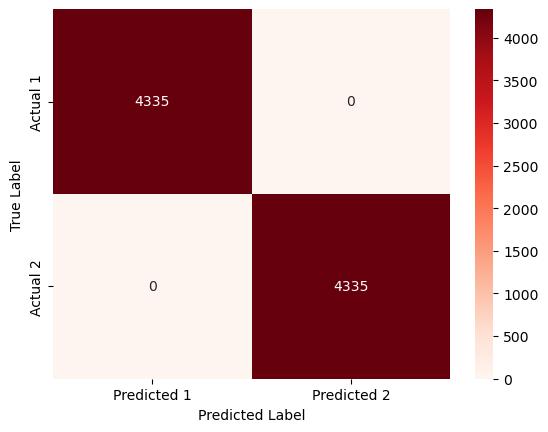

In [35]:
# Evaluate each model
print("Decision Tree Classifier:")
evaluate_model(y_resampled, y_pred1)

print("\nK-Nearest Neighbors:")
evaluate_model(y_resampled, y_pred2)

print("\nLogistic Regression:")
evaluate_model(y_resampled, y_pred3)

print("\nRandom Forest Classifier:")
evaluate_model(y_resampled, y_pred4)

print("\nSupport Vector Machine:")
evaluate_model(y_resampled, y_pred5)

print("\nNaive Bayes:")
evaluate_model(y_resampled, y_pred6)

print("\nCatBoost Classifier:")
evaluate_model(y_resampled, y_pred7)

In [36]:
# Using Joblib
import joblib

In [37]:
model_file1= open("Decision_tree_classifier.pkl","wb")
joblib.dump(clf,model_file1)
model_file1.close()

In [38]:
model_file2= open("K_neighbors_classifier.pkl","wb")
joblib.dump(knn,model_file2)
model_file2.close()

In [39]:
model_file3= open("Random_forest_classifier.pkl","wb")
joblib.dump(rf,model_file3)
model_file3.close()